In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df=pd.read_csv('/Users/tusharkhajuria/Downloads/HyderabadResturants.csv')



In [9]:
df.head(800)

,links,names,ratings,cuisine,price for one
38,https://www.zomato.com/hyderabad/andhra-meals-...,Andhra Meals And Tiffins,4.1,Andhra,400
35,https://www.zomato.com/hyderabad/rice-bowl-dil...,Rice Bowl,3.7,North Indian,400
33,https://www.zomato.com/hyderabad/cakezone-hima...,CakeZone,4.1,"Bakery, Desserts, Ice Cream, Pancake",400
43,https://www.zomato.com/hyderabad/capital-multi...,Capital Multi Cuisine Restaurant,3.9,"North Indian, Chinese, Biryani, Seafood, Kebab...",400
40,https://www.zomato.com/hyderabad/lunchbox-meal...,LunchBox - Meals and Thalis,3.9,"North Indian, Biryani, Chinese, Healthy Food, ...",400
...,...,...,...,...,...
55,https://www.zomato.com/hyderabad/sri-sai-ragha...,Sri Sai Raghavendra Udipi Veg,3.9,"South Indian, North Indian",50
346,https://www.zomato.com/hyderabad/apple-cut-fas...,Apple Cut Fast Food & Juice Center,4.1,Juices,50
169,https://www.zomato.com/hyderabad/green-treat-v...,Green Treat Vegetarian Food Court,4.1,"South Indian, Chinese, Fast Food, North Indian...",50
175,https://www.zomato.com/hyderabad/the-brooklyn-...,The Brooklyn Creamery - Healthy Ice Cream,3.8,Ice Cream,50


In [5]:
# Finding missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


links - 0%
names - 0%
ratings - 0%
cuisine - 0%
price for one - 0%


In [8]:
#So, our dataset doesn't contain any missing data
#Dropping duplicates
df.drop_duplicates()
df.sort_values(by=['price for one'],inplace=True, ascending=False)

<AxesSubplot:>

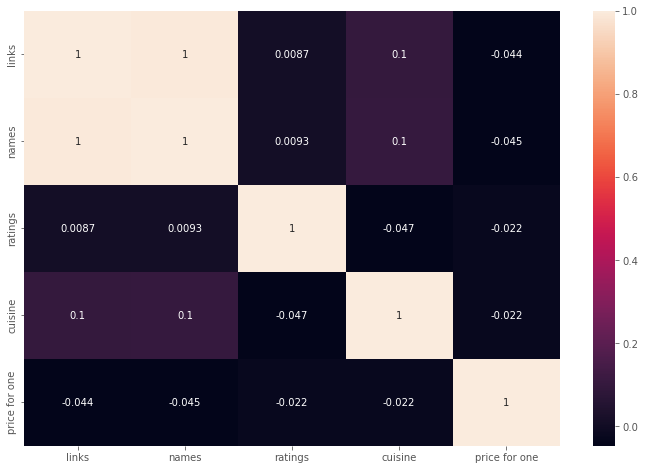

In [12]:
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
       
df_numerized.corr() #pearson 
correlation_mat=df_numerized.corr()
sns.heatmap(correlation_mat, annot=True) #Visualisation of correlation matrix
#Lighter the colour, higher the correlation.


In [15]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs
sorted_pairs=corr_pairs.sort_values()
high_correlation_sorted_pairs=sorted_pairs[(sorted_pairs)>0.5]
high_correlation_sorted_pairs=high_correlation_sorted_pairs[(sorted_pairs)<1.0]

In [ ]:
#Hence, there is no strong correlation between types of cuisine served and price to ratings